<a href="https://colab.research.google.com/github/Mubashar-Bashir/AgenticAI/blob/main/01_hello_agent_OpenAi_Agent_SDK_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install openai-agents SDK

In [1]:
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.8 MB/s eta 0:00:00


# Make your Jupyter Notebook capable of running asynchronous functions.

In [2]:
import nest_asyncio
nest_asyncio.apply()

# Run Google Gemini with OPENAI-Agent SDK

In [3]:
import os

from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
from agents.run import RunConfig
from google.colab import userdata

In [5]:
gemini_api_key = userdata.get("GOOGLE_API_KEY")


# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

config = RunConfig(
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)

# Hello world code | method one




In [6]:
agent: Agent = Agent(name="Assistant", instructions="You are a helpful assistant", model=model)

result = Runner.run_sync(agent, "Hello, how are you.", run_config=config)

print("\nCALLING AGENT\n")
print(result.final_output)


CALLING AGENT

Hello! As a large language model, I don't experience feelings in the same way humans do. But I'm functioning well and ready to assist you. How can I help you today?



# Hello world code | method two


In [7]:
import asyncio

from agents import Agent, Runner


async def main():
    agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
    )

    result = await Runner.run(agent, "Tell me about recursion in programming.",run_config=config)
    print(result.final_output)
    # Function calls itself,
    # Looping in smaller pieces,
    # Endless by design.


if __name__ == "__main__":
    asyncio.run(main())

A function calls self,
Solving smaller problems,
Base case stops the loop.



# Agent Level Custom model configuration

```python
agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
        model=OpenAIChatCompletionsModel(model=MODEL_NAME, openai_client=client),
    )

```

> **Note** `model=OpenAIChatCompletionsModel(model=MODEL_NAME, openai_client=client)`

In [9]:
import asyncio
import os

from openai import AsyncOpenAI

from agents import Agent, OpenAIChatCompletionsModel, Runner, function_tool, set_tracing_disabled

BASE_URL = os.getenv("EXAMPLE_BASE_URL") or "https://generativelanguage.googleapis.com/v1beta/openai/"
API_KEY = os.getenv("EXAMPLE_API_KEY") or userdata.get("GOOGLE_API_KEY")
MODEL_NAME = os.getenv("EXAMPLE_MODEL_NAME") or "gemini-2.0-flash"

# print(BASE_URL, API_KEY, MODEL_NAME)

if not BASE_URL or not API_KEY or not MODEL_NAME:
    raise ValueError(
        "Please set EXAMPLE_BASE_URL, EXAMPLE_API_KEY, EXAMPLE_MODEL_NAME via env var or code."
    )


client = AsyncOpenAI(base_url=BASE_URL, api_key=API_KEY)
set_tracing_disabled(disabled=True)



async def main():
    # This agent will use the custom LLM provider
    agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
        model=OpenAIChatCompletionsModel(model=MODEL_NAME, openai_client=client),
    )

    result = await Runner.run(agent, "Who is the founder of Pakistan?")
    print(result.final_output)


if __name__ == "__main__":
    asyncio.run(main())

Jinnah led the way,
For Muslims to have a home,
Pakistan was born.



# Set Model(LLM) configration on Global level
> **Note**
```python
set_default_openai_client(client=client, use_for_tracing=False)
set_default_openai_api("chat_completions")
set_tracing_disabled(disabled=True)
```

In [10]:
import asyncio
import os

from openai import AsyncOpenAI

from agents import (
    Agent,
    Runner,
    function_tool,
    set_default_openai_api,
    set_default_openai_client,
    set_tracing_disabled,
)

BASE_URL = os.getenv("EXAMPLE_BASE_URL") or "https://generativelanguage.googleapis.com/v1beta/openai/"
API_KEY = os.getenv("EXAMPLE_API_KEY") or userdata.get("GOOGLE_API_KEY")
MODEL_NAME = os.getenv("EXAMPLE_MODEL_NAME") or "gemini-2.0-flash"


if not BASE_URL or not API_KEY or not MODEL_NAME:
    raise ValueError(
        "Please set EXAMPLE_BASE_URL, EXAMPLE_API_KEY, EXAMPLE_MODEL_NAME via env var or code."
    )



client = AsyncOpenAI(
    base_url=BASE_URL,
    api_key=API_KEY,
)

set_default_openai_client(client=client, use_for_tracing=False)
set_default_openai_api("chat_completions")
set_tracing_disabled(disabled=True)


@function_tool
def get_weather(city: str):
    print(f"[debug] getting weather for {city}")
    return f"The weather in {city} is sunny."


async def main():
    agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
        model=MODEL_NAME,
        tools=[get_weather],
    )

    result = await Runner.run(agent, "What's the weather in Tokyo?")
    print(result.final_output)


if __name__ == "__main__":
    asyncio.run(main())

City of Tokyo,
Weather data is fetched now,
Awaiting results.



In [14]:
# prompt: give the test_image.jpeg to the above create agent to fetch json values from the image

from PIL import Image
import io
import json

# Assuming 'test_image.jpeg' is in the current directory
try:
    image_path = "/content/test_image.jpeg"
    image = Image.open(image_path)

    # Convert the image to a byte stream
    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    img_str = buffered.getvalue()

    # Now you can use img_str with your agent
    async def main_with_image():
        agent = Agent(
            name="ImageProcessor",
            instructions="""You are an OCR image processor and hand written feedback form data extractor.
            You will receive an image and you should return JSON object with the feedback form image description.""",
            model=model,  # Assuming 'model' is defined as in your previous code
        )

        result = await Runner.run(agent, f"Process this hand written feedback form image: {img_str}", run_config=config)

        try:
          # Attempt to parse the output as JSON
          json_output = json.loads(result.final_output)
          print(json_output)
        except json.JSONDecodeError:
          print(f"Could not decode JSON from agent's output: {result.final_output}")

    if __name__ == "__main__":
        asyncio.run(main_with_image())

except FileNotFoundError:
    print("Error: test_image.jpeg not found. Please ensure the image is in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Could not decode JSON from agent's output: ```json
{
  "form_type": "feedback",
  "fields": [
    {
      "field_name": "Course Content",
      "type": "rating",
      "rating": null
    },
    {
      "field_name": "Course Delivery",
      "type": "rating",
      "rating": null
    },
    {
      "field_name": "Course Material",
      "type": "rating",
      "rating": null
    },
    {
      "field_name": "How would you rate the course overall?",
      "type": "rating",
      "rating": null
    },
    {
      "field_name": "What did you like most about the course?",
      "type": "text",
      "text": "LR\\Rd1@t@\x08h21\x82\x801N\xa0"
    },
    {
      "field_name": "What could be improved?",
      "type": "text",
      "text": "\\7\x8a\x9a)\xd4"
    },
    {
      "field_name": "Any other comments?",
      "type": "text",
      "text": "Ph\x01;\xd3\xa93KA\x05"
    }
  ]
}
```


In [25]:
import asyncio
import json
import io
from PIL import Image
# from some_langchain_module import Agent, Runner  # Ensure proper LangChain imports

async def extract_feedback_from_image(image_path):
    """Processes an image and extracts structured feedback as JSON."""

    # Open and convert the image into a byte stream
    try:
        with Image.open(image_path) as image:
            buffered = io.BytesIO()
            image.save(buffered, format="JPEG")
            img_bytes = buffered.getvalue()
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    # Define the agent
    agent = Agent(
        name="ImageProcessor",
        instructions="""You are an OCR image processor and handwritten feedback form extractor.
        Your task is to return a structured JSON object with extracted values, strictly following this format:
        {
          "Name": "<Extracted Name>",
          "Institution": "<Extracted Institution>",
          "Contact": "<Extracted Contact Number>",
          "Designation": "<Extracted Designation>",
          "Content_relevance": "<Excellent | Good | Average | Poor>",
          "Clarity_of_explanation": "<Very Clear | Clear | Somewhat Unclear | Very Unclear>",
          "Presenter_engagement": "<Very Engaging | Moderately | Neutral | Not Engaging>",
          "Communication_effectiveness": "<Excellent | Good | Average | Poor>",
          "Overall_rating": "<Excellent | Good | Average | Poor>",
          "Suggestions_for_improvement": "<Extracted Text>",
          "Interest_in_more_sessions": "<Yes | No>",
          "Preferred_topics": "<Extracted Text>"
        }
        Respond only with a valid JSON object. No extra text.
        """,
        model=model,  # Ensure you use a model that supports image processing
    )

    # Run the agent with image input
    result = await Runner.run(agent, f"Process this handwritten feedback form image: {img_bytes}", run_config=config)
    # result = await Runner.run(agent, f"Process this hand written feedback form image: {img_str}", run_config=config)

    # Ensure the output is JSON
    try:
        json_output = json.loads(result.final_output)
        print(json.dumps(json_output, indent=4))  # Pretty-print JSON
        return json_output
    except json.JSONDecodeError:
        print(f"Error: Could not parse JSON. Output received: {result.final_output}")
        return None

# Run the function
if __name__ == "__main__":
    image_path = "/content/test_image.jpeg"
    print(image_path)
    asyncio.run(extract_feedback_from_image(image_path))


/content/test_image.jpeg
Error: Could not parse JSON. Output received: ```json
{
  "Name": "Manojna K.",
  "Institution": "NIT, Trichy",
  "Contact": "9597111427",
  "Designation": "Student",
  "Content_relevance": "Excellent",
  "Clarity_of_explanation": "Very Clear",
  "Presenter_engagement": "Very Engaging",
  "Communication_effectiveness": "Excellent",
  "Overall_rating": "Excellent",
  "Suggestions_for_improvement": "Nil",
  "Interest_in_more_sessions": "Yes",
  "Preferred_topics": "More on latest technology. i.e, AI"
}
```


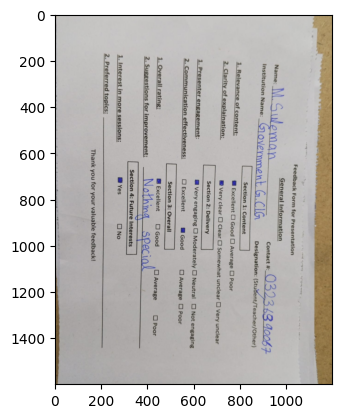

In [24]:
# prompt: open and show this image here test_image.jpeg left rotate anti clock 90

from PIL import Image
import matplotlib.pyplot as plt

try:
    image_path = "/content/test_image.jpeg"
    image = Image.open(image_path)
    plt.imshow(image)

    # Rotate the image 90 degrees counter-clockwise
    rotated_image = image.rotate(angle=90,expand=True)  # expand=True prevents cropping

    # Display the rotated image (in Colab)
    rotated_image.show()

except FileNotFoundError:
    print("Error: test_image.jpeg not found. Please ensure the image is in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
